In [3]:

library(WGCNA);
options(stringsAsFactors = FALSE);

femData = read.csv("../data/GSE73673/whole_table.tsv", sep='\t')

datExpr0 = as.data.frame(t(femData[, -c(1:2)]));
names(datExpr0) = femData$gene;
rownames(datExpr0) = names(femData)[-c(1:2)];

#=====================================================================================
#
#  Code chunk 3
#
#=====================================================================================


gsg = goodSamplesGenes(datExpr0, verbose = 3);
print(gsg$allOK)


 Flagging genes and samples with too many missing values...
  ..step 1
  ..Excluding 77 genes from the calculation due to too many missing samples or zero variance.
  ..step 2
[1] FALSE


In [4]:


#=====================================================================================
#
#  Code chunk 4
#
#=====================================================================================


if (!gsg$allOK)
{
  # Optionally, print the gene and sample names that were removed:
  if (sum(!gsg$goodGenes)>0) 
     printFlush(paste("Removing genes:", paste(names(datExpr0)[!gsg$goodGenes], collapse = ", ")));
  if (sum(!gsg$goodSamples)>0) 
     printFlush(paste("Removing samples:", paste(rownames(datExpr0)[!gsg$goodSamples], collapse = ", ")));
  # Remove the offending genes and samples from the data:
  datExpr0 = datExpr0[gsg$goodSamples, gsg$goodGenes]
}



Removing genes: b0016, b0022, b0256, b0300, b0360, b0361, b0372, b0373, b0540, b0541, b0543, b0552, b1027, b1028, b1370, b1402, b1403, b1404, b1544, b1545, b1546, b1547, b1548, b1549, b1550, b1551, b1552, b1553, b1554, b1555, b1556, b1557, b1558, b1559, b1560, b1561, b1562, b1563, b1564, b1565, b1566, b1567, b1568, b1569, b1570, b1571, b1572, b1573, b1575, b1576, b1577, b1578, b1579, b1996, b1997, b2030, b2088, b2089, b2192, b3044, b3045, b3218, b3444, b3445, b3483, b3505, b4284, b4286, b4412, b4455, b4505, b4510, b4528, b4533, b4561, b4638, b4641


clust
  1 
132 

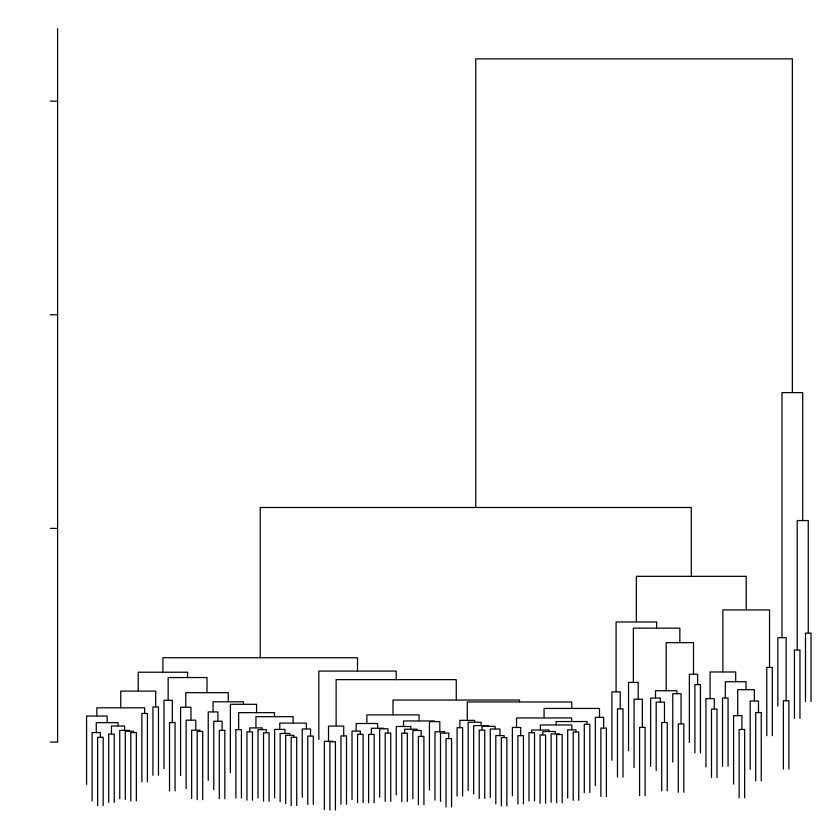

In [8]:

#=====================================================================================
#
#  Code chunk 5
#
#=====================================================================================


sampleTree = hclust(dist(datExpr0), method = "average");
# Plot the sample tree: Open a graphic output window of size 12 by 9 inches
# The user should change the dimensions if the window is too large or too small.
#sizeGrWindow(12,9)
#pdf(file = "Plots/sampleClustering.pdf", width = 12, height = 9);
par(cex = 0.6);
par(mar = c(0,4,2,0))
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="", cex.lab = 1.5, 
     cex.axis = 1.5, cex.main = 2)



#=====================================================================================
#
#  Code chunk 6
#
#=====================================================================================


# Plot a line to show the cut
cutHeight = 14000000
abline(h = cutHeight, col = "red");
# Determine cluster under the line
clust = cutreeStatic(sampleTree, cutHeight = cutHeight, minSize = 10)
table(clust)
# clust 1 contains the samples we want to keep.
keepSamples = (clust==1)
datExpr = datExpr0[keepSamples, ]
nGenes = ncol(datExpr)
nSamples = nrow(datExpr)

#print("names:", names(datExpr))
#stop()

pickSoftThreshold: will use block size 4217.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 4217 of 4217
   Power SFT.R.sq   slope truncated.R.sq mean.k. median.k. max.k.
1      1 0.805000  1.7400          0.785    2610      2940   3240
2      2 0.582000  0.7870          0.596    2020      2430   2760
3      3 0.332000  0.4290          0.452    1680      2060   2480
4      4 0.142000  0.2390          0.337    1450      1780   2290
5      5 0.031900  0.1080          0.319    1280      1550   2140
6      6 0.000598  0.0143          0.392    1140      1350   2010
7      7 0.011700 -0.0661          0.506    1030      1190   1900
8      8 0.042200 -0.1240          0.581     945      1050   1810
9      9 0.079100 -0.1720          0.646     869       937   1730
10    10 0.124000 -0.2160          0.687     803       833   1660
11    12 0.202000 -0.2770          0.753     696       668   1530
12    14 0.267000 -0.3260          0.799     612     

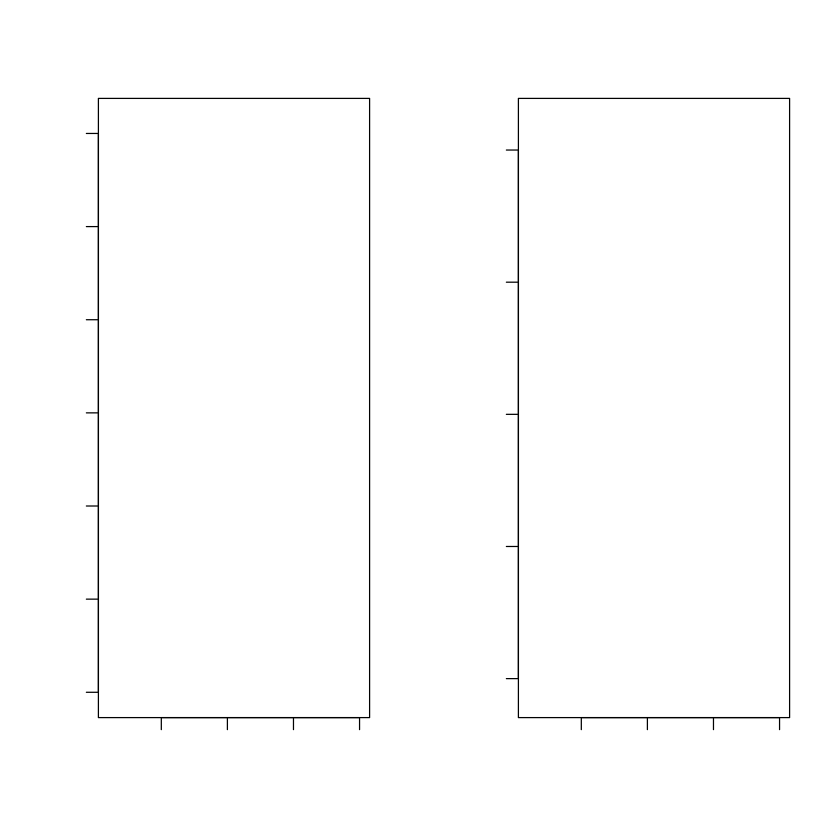

In [11]:



#=====================================================================================
#
#  Code chunk 2
#
#=====================================================================================


# Choose a set of soft-thresholding powers
powers = c(c(1:10), seq(from = 12, to=20, by=2))
# Call the network topology analysis function
sft = pickSoftThreshold(datExpr, powerVector = powers, verbose = 5)
print(sft)
# Plot the results:
# sizeGrWindow(9, 5)
par(mfrow = c(1,2));
cex1 = 0.9;
# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
     main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     labels=powers,cex=cex1,col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
     xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
     main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
adjacency: replaceMissing: 0
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication..
    ..normalization..
    ..done.
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking modules for statistical meaningfulness..
     ..removing 19 genes from module 1 because their KME is too low.
     ..removing 2 genes from module 2 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.25
       Calculating new MEs...


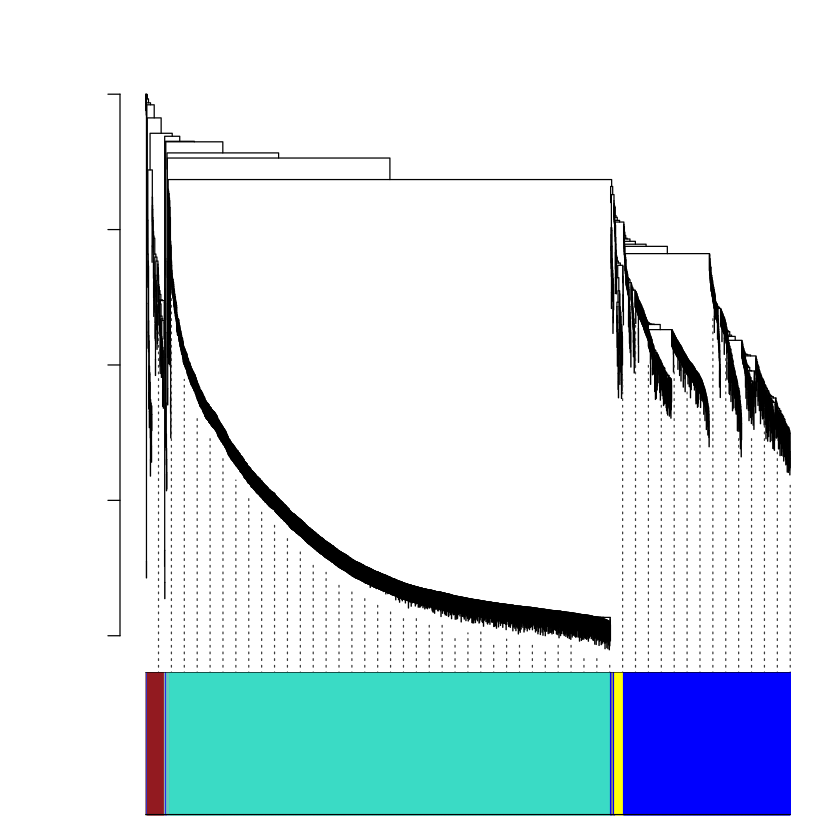

In [12]:





#=====================================================================================
#
#  Code chunk 3
#
#=====================================================================================


net = blockwiseModules(datExpr, power = 6,
                       TOMType = "unsigned", minModuleSize = 30,
                       reassignThreshold = 0, mergeCutHeight = 0.25,
                       numericLabels = TRUE, pamRespectsDendro = FALSE,
                       saveTOMs = FALSE,
                       verbose = 3)


#=====================================================================================
#
#  Code chunk 4
#
#=====================================================================================


# open a graphics window
#sizeGrWindow(12, 9)
# Convert labels to colors for plotting
mergedColors = labels2colors(net$colors)
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
                    "Module colors",
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05)

In [14]:



#=====================================================================================
#
#  Code chunk 5
#
#=====================================================================================


moduleLabels = net$colors
moduleColors = labels2colors(net$colors)
MEs = net$MEs;
geneTree = net$dendrograms[[1]];
print(unique(moduleColors))

# Recalculate topological overlap if needed
TOM = TOMsimilarityFromExpr(datExpr, power = 6);
# Read in the annotation file
# annot = read.csv(file = "GeneAnnotation.csv");
# Select modules#
#modules = c("brown", "red", "yellow", "blue", "green", "turquoise");
modules = unique(moduleColors)
# Select module probes
probes = names(datExpr)
inModule = is.finite(match(moduleColors, modules));
modProbes = probes[inModule];
#print(modProbes)
# modGenes = annot$gene_symbol[match(modProbes, annot$substanceBXH)];
# Select the corresponding Topological Overlap
modTOM = TOM[inModule, inModule];
dimnames(modTOM) = list(modProbes, modProbes)
print("modTOM", modTOM)
# Export the network into edge and node list files Cytoscape can read
cyt = exportNetworkToCytoscape(modTOM,
  edgeFile = paste("CytoscapeInput-edges", ".txt", sep=""),
  nodeFile = paste("CytoscapeInput-nodes", ".txt", sep=""),
  weighted = TRUE,
  threshold = 0.02,
  nodeNames = modProbes,
  nodeAttr = moduleColors[inModule]);

save(modTOM, modProbes, moduleColors, inModule, file="saved.RData")




[1] "blue"      "turquoise" "grey"      "yellow"    "brown"    
TOM calculation: adjacency..
adjacency: replaceMissing: 0
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication..
..normalization..
..done.
[1] "modTOM"
